# Signal e- Run 03 Analysis

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import pickle as pkl
import os
from sys import getsizeof
import re
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.offline import iplot, plot

In [4]:
init_notebook_mode(True)

In [5]:
from mu2e import mu2e_ext_path
from hallprobecalib.hpcplots import scatter2d, scatter3d, histo

## Exploring Trajectory Run 03

### Concat Files to one DataFrame

In [6]:
r_init = re.compile("trajectory.*INIT_COND\.p$")
r_data = re.compile("trajectory.*\d\d\d\.p$")
directory03 = mu2e_ext_path+'trajectory/run03/'

In [7]:
init_03 = [directory03+f for f in os.listdir(directory03) if r_init.match(f)]
data_03 = sorted([directory03+f for f in os.listdir(directory03) if r_data.match(f)])

In [8]:
init_03

['/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_INIT_COND.p']

In [9]:
data_03

['/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_000.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_001.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_002.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_003.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_004.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_005.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_006.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_007.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_008.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajectory_run03_10e-11step_Dop853_009.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run03/trajector

Now we have lists of files to read in and have separated them by run and type of file. Now we can load in everything and concatenate!

In [10]:
# run 03
# load in all dataframes
df = []
for fname in data_03:
    df_ = pkl.load(open(fname,'rb'))
    df_.eval('run = 3', inplace=True)
    df_.run = df_.run.astype('category')
    df.append(df_)

In [11]:
# concat!
df = pd.concat(df, join='outer', ignore_index=True, sort = False)

In [12]:
df

X           Y            Z            Vx            Vy  \
0       -14.647705   37.616524  5899.977539  1.348208e+11  2.642890e+11   
1       -13.315936   40.268547  5900.407514  1.314621e+11  2.659765e+11   
2       -12.017866   42.937235  5900.837437  1.280827e+11  2.676210e+11   
3       -10.753699   45.622158  5901.267310  1.246832e+11  2.692224e+11   
4        -9.523634   48.322881  5901.697136  1.212641e+11  2.707804e+11   
5        -8.327865   51.038970  5902.126920  1.178259e+11  2.722947e+11   
6        -7.166579   53.769987  5902.556663  1.143693e+11  2.737651e+11   
7        -6.039957   56.515491  5902.986368  1.108947e+11  2.751915e+11   
8        -4.948178   59.275041  5903.416039  1.074028e+11  2.765735e+11   
9        -3.891410   62.048193  5903.845676  1.038941e+11  2.779111e+11   
10       -2.869820   64.834500  5904.275284  1.003692e+11  2.792039e+11   
11       -1.883568   67.633515  5904.704863  9.682857e+10  2.804519e+11   
12       -0.932806   70.444788  5905.134416  9.327288e+10  2.816548e+11   
13       -0.017682   73.267866  5905.563945  8.970269e+10  2.828125e+11   
14        0.861660   76.102297  5905.993452  8.611856e+10  2.839247e+11   
15        1.705085   78.947625  5906.422939  8.252108e+10  2.849914e+11   
16        2.512462   81.803394  5906.852407  7.891082e+10  2.860123e+11   
17        3.283665   84.669146  5907.281858  7.528837e+10  2.869874e+11   
18        4.018577   87.544421  5907.711294  7.165430e+10  2.879165e+11   
19        4.717083   90.428759  5908.140716  6.800922e+10  2.887994e+11   
20        5.379076   93.321697  5908.570126  6.435369e+10  2.896360e+11   
21        6.004455   96.222771  5908.999525  6.068832e+10  2.904263e+11   
22        6.593125   99.131518  5909.428914  5.701369e+10  2.911701e+11   
23        7.144995  102.047473  5909.858296  5.333038e+10  2.918673e+11   
24        7.659982  104.970167  5910.287670  4.963900e+10  2.925178e+11   
25        8.138009  107.899135  5910.717039  4.594013e+10  2.931216e+11   
26        8.579002  110.833907  5911.146403  4.223437e+10  2.936785e+11   
27        8.982896  113.774015  5911.575764  3.852231e+10  2.941885e+11   
28        9.349632  116.718989  5912.005124  3.480454e+10  2.946514e+11   
29        9.679154  119.668360  5912.434482  3.108166e+10  2.950674e+11   
...            ...         ...          ...           ...           ...   
213052 -100.768762 -516.412302  8192.505831  2.914937e+11 -1.876155e+10   
213053  -97.852322 -516.587329  8193.180769  2.916448e+11 -1.623481e+10   
213054  -94.934480 -516.737076  8193.855728  2.917741e+11 -1.370697e+10   
213055  -92.015455 -516.861534  8194.530709  2.918814e+11 -1.117821e+10   
213056  -89.095466 -516.960694  8195.205711  2.919668e+11 -8.648732e+09   
213057  -86.174733 -517.034550  8195.880736  2.920302e+11 -6.118715e+09   
213058  -83.253474 -517.083098  8196.555782  2.920718e+11 -3.588352e+09   
213059  -80.331909 -517.106335  8197.230849  2.920914e+11 -1.057834e+09   
213060  -77.410258 -517.104261  8197.905938  2.920891e+11  1.472650e+09   
213061  -74.488739 -517.076876  8198.581048  2.920649e+11  4.002911e+09   
213062  -71.567571 -517.024184  8199.256179  2.920188e+11  6.532758e+09   
213063  -68.646975 -516.946191  8199.931331  2.919508e+11  9.062003e+09   
213064  -65.727168 -516.842902  8200.606504  2.918609e+11  1.159045e+10   
213065  -62.808371 -516.714327  8201.281697  2.917490e+11  1.411793e+10   
213066  -59.890801 -516.560477  8201.956912  2.916153e+11  1.664423e+10   
213067  -56.974678 -516.381364  8202.632146  2.914598e+11  1.916916e+10   
213068  -54.060221 -516.177003  8203.307402  2.912824e+11  2.169256e+10   
213069  -51.147647 -515.947411  8203.982677  2.910831e+11  2.421421e+10   
213070  -48.237175 -515.692605  8204.657973  2.908621e+11  2.673394e+10   
213071  -45.329024 -515.412606  8205.333289  2.906192e+11  2.925155e+10   
213072  -42.423410 -515.107436  8206.008625  2.903546e+11  3.176686e+10   
213073  -39.520553 -514.777119  8206.68398

In [13]:
# check size in MB
getsizeof(df) / 1000 / 1000

17.259833999999998

In [14]:
# init conditions
df_init = []
# run03
df_ = pkl.load(open(init_03[0],'rb'))
df_.eval('run = 3', inplace=True)
df_.run = df_.run.astype('category')
df_['event'] = df_.index.astype('category')
df_init.append(df_)

In [15]:
df_init = pd.concat(df_init, join='outer', ignore_index=True, sort = False)

In [16]:
getsizeof(df_init) / 1000 / 1000

0.013112

In [17]:
df_init[df_init.event == 0]

X0         Y0           Z0     Phi0  CosTheta0    Theta0        Px0  \
0 -14.647705  37.616524  5899.977539  1.09908   0.143399  1.426901  47.220498   

         Py0        Pz0         Pt0 run event  
0  92.566266  15.056922  103.914817   3     0

Rather than keep a run+event id system, let's keep a single particle # starting from 0 at run1 event0 and incrementing through run1 then run2.

In [20]:
# this is pretty hacky...especially the 200. Should do this on initial import.
#df_init.eval('particle = (run - 1)*200 + event',inplace=True)
# instead do by index!
df_init.eval('particle = index',inplace=True)
df_init.particle = df_init.particle.astype('category')
#df_init.drop(['run','event'],axis=1,inplace=True)

#df.eval('particle = (run - 3)*200 + event',inplace=True)
df.eval('particle = event',inplace=True)
#df.eval('particle = index',inplace=True)
df.particle = df.particle.astype('category')
#df.drop(['run','event'],axis=1,inplace=True)

In [21]:
df_init

X0         Y0           Z0      Phi0  CosTheta0    Theta0  \
0  -14.647705  37.616524  5899.977539  1.099080   0.143399  1.426901   
1   23.620117  23.873680  5722.189941  6.090903   0.494710  1.053295   
2   -9.940674  66.988113  5766.657715  1.065133   0.239092  1.329366   
3   38.080566   1.296604  6100.037109  2.087748   0.675679  0.828911   
4   34.759766   3.226178  5566.687012  1.108421   0.643033  0.872344   
5  -28.667969 -36.301380  5811.079590  6.026849  -0.614701  2.232804   
6   66.123047  25.369076  5722.238770  4.664505  -0.348496  1.926763   
7   53.149902  33.059135  5500.024414  4.035997  -0.342071  1.919917   
8    9.153076  35.646210  5944.477539  0.452865  -0.961317  2.862540   
9  -11.272949  20.334005  5611.120605  1.557317   0.615467  0.907818   
10 -41.389893  57.445614  5966.654297  3.036369   0.033066  1.537724   
11  41.981689  30.997656  5611.079590  5.154329  -0.742405  2.407450   
12 -73.107910  -0.608046  5877.784180  3.639897  -0.275818  1.850237   
13 -42.511475 -52.668507  5877.733887  1.694612  -0.921215  2.741989   
14  40.502686 -29.175142  6255.591309  1.857401   0.520822  1.022983   
15 -60.653564   6.933150  6188.895508  2.877747  -0.630111  2.252492   
16  -8.254639 -31.435097  6233.342773  4.383886   0.693930  0.803864   
17  -3.920166  59.549194  5944.435547  0.975760  -0.454556  2.042670   
18  -0.253662 -29.364162  5811.080566  1.901383  -0.282754  1.857461   
19  46.659180  34.961952  6255.530273  2.978535  -0.305188  1.880932   
20  49.695068   4.662344  5788.921387  5.568224  -0.109689  1.680706   
21  15.107910  67.707497  5700.024414  4.172395   0.959414  0.285881   
22 -31.315186  27.863922  6255.581055  4.155819  -0.164957  1.736511   
23 -65.401367  25.264011  5499.963867  5.735591   0.426898  1.129737   
24   9.655029 -20.192366  5566.715820  4.792419  -0.399924  1.982231   
25  56.189209 -29.202251  5811.089355  1.543009  -0.298928  1.874366   
26  37.463623  19.239874  6166.641113  5.638220  -0.150446  1.721816   
27 -35.523682 -56.483265  5677.820312  1.699075   0.789279  0.661162   
28  21.799072  39.480423  5544.458496  1.178689   0.037017  1.533771   
29  52.364258 -24.208195  5655.507324  1.614813   0.321125  1.243879   
..        ...        ...          ...       ...        ...       ...   
70  21.095947   7.708527  5766.708008  2.077004   0.476367  1.074278   
71 -38.951904 -51.505199  5988.875977  0.784475  -0.307041  1.882879   
72 -16.832764  19.967945  5766.674805  2.385792   0.549787  0.988687   
73 -23.720947   2.134451  6277.758789  1.366492  -0.205942  1.778222   
74  31.838135  24.778772  5855.534180  2.627373   0.159471  1.410641   
75 -44.398193 -15.455354  6011.112793  4.810932   0.904364  0.440910   
76  18.634033  37.140675  6233.311523  3.493761   0.388570  1.171717   
77  10.830566  32.455357  5766.666504  0.064824  -0.000885  1.571681   
78 -58.532959  40.939732  6122.264648  4.910084   0.011775  1.559021   
79  47.473877  21.153326  6144.398438  5.257480  -0.566407  2.172935   
80 -50.100342  16.850462  5522.173340  1.269704   0.596218  0.932014   
81  18.381836  52.731468  5944.430176  2.681155   0.757322  0.711593   
82   5.950684  29.023317  6033.332031  4.033133   0.744025  0.731721   
83 -37.355713  57.041393  6011.123047  0.791470   0.408741  1.149722   
84 -42.911377 -33.618893  6077.752441  1.186206  -0.441873  2.028481   
85  12.973389  31.342281  5788.934570  0.824856  -0.377220  1.957589   
86  19.777344  29.125725  5877.798340  1.251940   0.413337  1.144680   
87  25.109375  20.571846  5633.320312  6.206308  -0.006620  1.577417   
88  23.044678  63.310570  5922.204590  3.512589  -0.965617  2.878602   
89 -46.408936  41.654037  5611.115723  0.438668   0.104460  1.466146   
90 -14.519287  34.646629  5611.108887  0.328588  -0.101532  1.672503   
91  -1.897949  61.305016  5788.839844  5.033382   0.276389  1.290762   
92  20.778564  40.104748  5677.789062  1.811172  -0.578882  2.188153   
93  25.730957  28.097282  5988.853027  5.794095  -0

In [22]:
df

X           Y            Z            Vx            Vy  \
0       -14.647705   37.616524  5899.977539  1.348208e+11  2.642890e+11   
1       -13.315936   40.268547  5900.407514  1.314621e+11  2.659765e+11   
2       -12.017866   42.937235  5900.837437  1.280827e+11  2.676210e+11   
3       -10.753699   45.622158  5901.267310  1.246832e+11  2.692224e+11   
4        -9.523634   48.322881  5901.697136  1.212641e+11  2.707804e+11   
5        -8.327865   51.038970  5902.126920  1.178259e+11  2.722947e+11   
6        -7.166579   53.769987  5902.556663  1.143693e+11  2.737651e+11   
7        -6.039957   56.515491  5902.986368  1.108947e+11  2.751915e+11   
8        -4.948178   59.275041  5903.416039  1.074028e+11  2.765735e+11   
9        -3.891410   62.048193  5903.845676  1.038941e+11  2.779111e+11   
10       -2.869820   64.834500  5904.275284  1.003692e+11  2.792039e+11   
11       -1.883568   67.633515  5904.704863  9.682857e+10  2.804519e+11   
12       -0.932806   70.444788  5905.134416  9.327288e+10  2.816548e+11   
13       -0.017682   73.267866  5905.563945  8.970269e+10  2.828125e+11   
14        0.861660   76.102297  5905.993452  8.611856e+10  2.839247e+11   
15        1.705085   78.947625  5906.422939  8.252108e+10  2.849914e+11   
16        2.512462   81.803394  5906.852407  7.891082e+10  2.860123e+11   
17        3.283665   84.669146  5907.281858  7.528837e+10  2.869874e+11   
18        4.018577   87.544421  5907.711294  7.165430e+10  2.879165e+11   
19        4.717083   90.428759  5908.140716  6.800922e+10  2.887994e+11   
20        5.379076   93.321697  5908.570126  6.435369e+10  2.896360e+11   
21        6.004455   96.222771  5908.999525  6.068832e+10  2.904263e+11   
22        6.593125   99.131518  5909.428914  5.701369e+10  2.911701e+11   
23        7.144995  102.047473  5909.858296  5.333038e+10  2.918673e+11   
24        7.659982  104.970167  5910.287670  4.963900e+10  2.925178e+11   
25        8.138009  107.899135  5910.717039  4.594013e+10  2.931216e+11   
26        8.579002  110.833907  5911.146403  4.223437e+10  2.936785e+11   
27        8.982896  113.774015  5911.575764  3.852231e+10  2.941885e+11   
28        9.349632  116.718989  5912.005124  3.480454e+10  2.946514e+11   
29        9.679154  119.668360  5912.434482  3.108166e+10  2.950674e+11   
...            ...         ...          ...           ...           ...   
213052 -100.768762 -516.412302  8192.505831  2.914937e+11 -1.876155e+10   
213053  -97.852322 -516.587329  8193.180769  2.916448e+11 -1.623481e+10   
213054  -94.934480 -516.737076  8193.855728  2.917741e+11 -1.370697e+10   
213055  -92.015455 -516.861534  8194.530709  2.918814e+11 -1.117821e+10   
213056  -89.095466 -516.960694  8195.205711  2.919668e+11 -8.648732e+09   
213057  -86.174733 -517.034550  8195.880736  2.920302e+11 -6.118715e+09   
213058  -83.253474 -517.083098  8196.555782  2.920718e+11 -3.588352e+09   
213059  -80.331909 -517.106335  8197.230849  2.920914e+11 -1.057834e+09   
213060  -77.410258 -517.104261  8197.905938  2.920891e+11  1.472650e+09   
213061  -74.488739 -517.076876  8198.581048  2.920649e+11  4.002911e+09   
213062  -71.567571 -517.024184  8199.256179  2.920188e+11  6.532758e+09   
213063  -68.646975 -516.946191  8199.931331  2.919508e+11  9.062003e+09   
213064  -65.727168 -516.842902  8200.606504  2.918609e+11  1.159045e+10   
213065  -62.808371 -516.714327  8201.281697  2.917490e+11  1.411793e+10   
213066  -59.890801 -516.560477  8201.956912  2.916153e+11  1.664423e+10   
213067  -56.974678 -516.381364  8202.632146  2.914598e+11  1.916916e+10   
213068  -54.060221 -516.177003  8203.307402  2.912824e+11  2.169256e+10   
213069  -51.147647 -515.947411  8203.982677  2.910831e+11  2.421421e+10   
213070  -48.237175 -515.692605  8204.657973  2.908621e+11  2.673394e+10   
213071  -45.329024 -515.412606  8205.333289  2.906192e+11  2.925155e+10   
213072  -42.423410 -515.107436  8206.008625  2.903546e+11  3.176686e+10   
213073  -39.520553 -514.777119  8206.68398

Now that we have some nice looking dataframes let's write them out for later use.

In [23]:
pkl.dump(df,open(mu2e_ext_path+'trajectory/traj.run03.df.data.p','wb'))
pkl.dump(df_init,open(mu2e_ext_path+'trajectory/traj.run03.df.init.p','wb'))

### Exploring Trajectories (Plots)

In [20]:
plotdir = mu2e_ext_path+'trajectory/plots_michael_05-01-19/'

First let's try to load in the newly cleaned datasets.

In [21]:
df_init = pkl.load(open(mu2e_ext_path+'trajectory/traj.run03.df.init.p','rb'))
df = pkl.load(open(mu2e_ext_path+'trajectory/traj.run03.df.data.p','rb'))

Now we can get some general ideas in trends of positional data. An easy case is how conversion e- populate X and Y. The full data is overkill and a bit unwieldy, so we'll select every 10 data points (1e-10 s).

In [22]:
df_small = df.iloc[::10,:]

In [23]:
getsizeof(df_small)/1000/1000

1.75069

In [24]:
df_small

X           Y            Z            Vx            Vy  \
0       -14.647705   37.616524  5899.977539  1.348208e+11  2.642890e+11   
10       -2.869820   64.834500  5904.275284  1.003692e+11  2.792039e+11   
20        5.379076   93.321697  5908.570126  6.435369e+10  2.896360e+11   
30        9.971415  122.621655  5912.863840  2.735427e+10  2.954362e+11   
40       10.838340  152.266680  5917.157651 -1.003543e+10  2.965293e+11   
50        7.970758  181.785317  5921.452514 -4.722315e+10  2.929147e+11   
60        1.417455  210.709582  5925.749227 -8.363072e+10  2.846630e+11   
70       -8.713936  238.582413  5930.048486 -1.186733e+11  2.719216e+11   
80      -22.259233  264.964987  5934.350915 -1.518029e+11  2.549070e+11   
90      -39.001041  289.443503  5938.657072 -1.825049e+11  2.339022e+11   
100     -58.672483  311.635540  5942.967467 -2.103057e+11  2.092508e+11   
110     -80.961668  331.195869  5947.282563 -2.347801e+11  1.813519e+11   
120    -105.516839  347.821644  5951.602779 -2.555570e+11  1.506526e+11   
130    -131.952088  361.256877  5955.928494 -2.723255e+11  1.176414e+11   
140    -159.853572  371.296164  5960.260047 -2.848387e+11  8.283981e+10   
150    -188.786098  377.787575  5964.597740 -2.929170e+11  4.679425e+10   
160    -218.299999  380.634712  5968.941839 -2.964507e+11  1.006715e+10   
170    -247.938171  379.797874  5973.292574 -2.954011e+11 -2.677173e+10   
180    -277.243168  375.294347  5977.650141 -2.898000e+11 -6.315416e+10   
190    -305.764256  367.197813  5982.014703 -2.797494e+11 -9.852218e+10   
200    -333.064290  355.636896  5986.386390 -2.654187e+11 -1.323366e+11   
210    -358.726345  340.792873  5990.765300 -2.470421e+11 -1.640851e+11   
220    -382.359975  322.896608  5995.151501 -2.249141e+11 -1.932897e+11   
230    -403.607019  302.224740  5999.545033 -1.993849e+11 -2.195142e+11   
240    -422.146876  279.095218  6003.945904 -1.708543e+11 -2.423700e+11   
250    -437.701156  253.862233  6008.354097 -1.397654e+11 -2.615217e+11   
260    -450.037665  226.910647  6012.769568 -1.065975e+11 -2.766922e+11   
270    -458.973655  198.649995  6017.192244 -7.185861e+10 -2.876657e+11   
280    -464.378303  169.508173  6021.622030 -3.607769e+10 -2.942913e+11   
290    -466.174385  139.924891  6026.058806  2.037715e+08 -2.964841e+11   
...            ...         ...          ...           ...           ...   
212790 -319.366285   52.723450  8016.620968 -2.052666e+11 -2.080525e+11   
212800 -338.957896   31.038658  8023.297353 -1.862179e+11 -2.252541e+11   
212810 -356.571768    7.719650  8029.976548 -1.657476e+11 -2.407083e+11   
212820 -372.073630  -17.052910  8036.658580 -1.440157e+11 -2.542998e+11   
212830 -385.345697  -43.087542  8043.343481 -1.211917e+11 -2.659279e+11   
212840 -396.287514  -70.183453  8050.031281 -9.745249e+10 -2.755071e+11   
212850 -404.816673  -98.132096  8056.722010 -7.298163e+10 -2.829680e+11   
212860 -410.869381 -126.718790  8063.415697 -4.796762e+10 -2.882575e+11   
212870 -414.400892 -155.724367  8070.112365 -2.260254e+10 -2.913389e+11   
212880 -415.385790 -184.926858  8076.812036  2.919442e+09 -2.921929e+11   
212890 -413.818126 -214.103186  8083.514726  2.840352e+10 -2.908168e+11   
212900 -409.711404 -243.030863  8090.220445  5.365574e+10 -2.872249e+11   
212910 -403.098423 -271.489677  8096.929199  7.848447e+10 -2.814484e+11   
212920 -394.030978 -299.263351  8103.640986  1.027018e+11 -2.735348e+11   
212930 -382.579413 -326.141170  8110.355797  1.261250e+11 -2.635477e+11   
212940 -368.832036 -351.919559  8117.073617  1.485778e+11 -2.515661e+11   
212950 -352.894411 -376.403599  8123.794422  1.698917e+11 -2.376841e+11   
212960 -334.888508 -399.408477  8130.518182  1.899072e+11 -2.220094e+11   
212970 -314.951749 -420.760853  8137.244858  2.084752e+11 -2.046635e+11   
212980 -293.235929 -440.300131  8143.974403  2.254575e+11 -1.857798e+11   
212990 -269.906040 -457.879642  8150.706762  2.407286e+11 -1.655029e+11   
213000 -245.139000 -473.367704  8157.44187

In [25]:
data = [
    #go.Histogram2dContour(
    go.Histogram2d(
        x=df_small['X'],
        y=df_small['Y'],
        colorscale='Viridis',
        #bins
        #line=line(width=0.1)
    )
]

axis_template = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444'
)

layout = go.Layout(xaxis=axis_template,
                   yaxis=axis_template,
                   width=800,
                   height=750,
                   autosize=False,
                   hovermode='closest',
                   title='Signal e- Trajectory 2d Histo'
)

fig = go.Figure(data=data, layout=layout)

In [26]:
iplot(fig, filename=mu2e_ext_path+"trajectory/xy_2d_histo_sparse2.html")

In [27]:
grouped = df.groupby('particle')

In [28]:
#zmax = grouped['Z'].agg(np.max)
zmax = grouped['Z'].last()

In [29]:
histo(zmax,xlabel='Z_max (mm)',bins=15,inline=True)
histo(zmax[zmax<6290],xlabel='Z_max (mm)',bins=15,inline=True)
histo(zmax[zmax<8410],xlabel='Z_max (mm)',bins=15,inline=True)

This is slightly concerning. About 50% of all electrons terminate at or before the stopping target. This makes me question the validity of the current implementation of the trajectory code.

In [30]:
start_E = grouped['E0'].first()
end_E = grouped['EF'].last()

In [31]:
e_change = end_E - start_E

In [32]:
e_change.name = ""

In [33]:
histo(e_change,xlabel=f'$\Delta E (MeV)$',yscale='linear',bins=30,inline=True)
histo(e_change,xlabel=f'$\Delta E (MeV)$',yscale='linear',bins=30,cut=[0.,.75],inline=True)

In [34]:
data = [
    #go.Histogram2dContour(
    go.Scatter(
        x=zmax,
        y=e_change,
        mode='markers',
        #colorscale='Viridis',
        #bins
        #line=line(width=0.1)
    )
]

axis_template = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444'
)

layout = go.Layout(xaxis=axis_template,
                   yaxis=axis_template,
                   width=800,
                   height=750,
                   autosize=False,
                   hovermode='closest',
                   title=''
)

fig = go.Figure(data=data, layout=layout)

In [35]:
iplot(fig)

In [36]:
#zpick = zmax < 6000
zpick = zmax < 7500

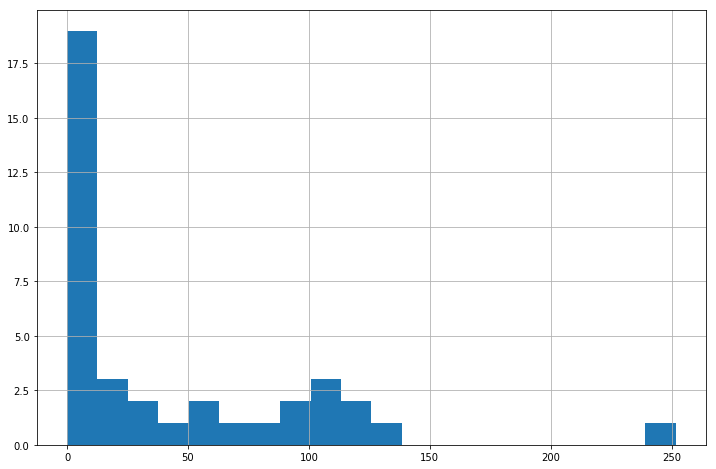

In [37]:
e_change[zpick].hist(bins=20)

So it looks like a large number of the particles terminating in the graded region also have large errors (energy should not change in a magnetic field only region). Let's explore the termination a bit more.

In [38]:
start = grouped.first()
end = grouped.last()

In [39]:
end

X           Y             Z            Vx            Vy  \
particle                                                                     
0        -485.933363  -64.782387   7940.907782  1.819310e+11 -2.309814e+11   
1          72.412984  -81.961746  11854.272404  2.562166e+11  1.690889e+10   
2        -398.462910  453.341267   8915.403086 -2.385261e+11 -1.612268e+11   
3        -215.300655  141.093126  12001.369735 -1.985149e+11 -8.628634e+10   
4          70.137050  -92.550974  12000.038674  1.447684e+11  1.700311e+11   
5         164.251639  180.091480   3999.302185 -7.075357e+10  2.295154e+11   
6         482.842412  147.704063   3999.206143 -1.460392e+11  2.419933e+11   
7          17.628331 -251.429764   3999.677168  1.656249e+11 -2.297924e+11   
8         -58.783131  121.550562   3997.807372 -4.720551e+10 -7.032928e+10   
9         -19.902037  220.573077  12000.981130 -1.733846e+11  1.521934e+11   
10       -191.119480   95.023602   6868.902376 -2.718955e+11 -1.214733e+11   
11        134.360938  205.338332   3999.592663 -1.880448e+11 -7.502922e+10   
12        305.409173   42.495522   3999.794863 -1.720001e+11  2.351909e+11   
13       -182.135810 -108.403038   3997.940802  8.261724e+10 -8.458202e+10   
14       -218.325928  200.320837  12000.472848 -2.475274e+11 -4.472328e+10   
15         -9.036065 -275.574644   3999.908834  1.597262e+11  1.736162e+11   
16        -83.325377  -35.165702  12001.804563 -3.731784e+10 -2.105282e+11   
17        -71.736510  336.933352   3999.358613 -2.240840e+11  1.489328e+11   
18       -549.564863 -109.389258   3999.740261 -1.871238e+10 -2.894542e+11   
19       -324.108363 -212.506724   3999.318584 -1.302582e+10 -2.891773e+11   
20       -187.240006  -12.262172   4809.732000  1.170678e+11 -2.754968e+11   
21         54.695820  -55.424979  12000.011943  8.088301e+10 -1.582915e+10   
22        181.166918 -466.113666   4769.893847  2.984148e+11 -1.091828e+10   
23        263.759186  -13.239109  10899.878079  1.838510e+11  1.928124e+11   
24          1.963370   -4.905143   3999.229924 -8.075479e+09 -2.765832e+11   
25       -357.813345  243.372796   3999.752483 -2.476029e+11 -1.502954e+11   
26        527.141508   43.178494   4681.807369  1.470312e+11  2.595590e+11   
27         33.647510  -32.497623  12000.053240 -3.714789e+10  1.758579e+11   
28        121.958532  202.871736   6433.996004 -7.272036e+10  2.889474e+11   
29       -261.752077  275.632006   9877.880994 -2.662492e+11 -8.284075e+10   
...              ...         ...           ...           ...           ...   
45         -3.912252  -24.890008  12002.233836 -7.078544e+10 -2.188904e+10   
46         83.970295  120.822063  12001.122497 -1.658898e+11 -7.328938e+10   
47       -101.402065  337.690533  10019.152268 -2.549137e+11  1.114451e+11   
48       -206.437800   32.572152   6746.801808 -2.747187e+11 -1.144463e+11   
49         43.371764 -315.475702  12001.585992  2.142909e+11  1.165115e+11   
50        475.654511 -194.412290   3999.684499  8.303800e+10  2.748052e+11   
51        352.897791  148.603017   3999.395082 -1.789731e+11  1.898846e+11   
52        -14.353025 -178.004683   6564.056804  1.137290e+11 -2.768330e+11   
53         38.054785  -55.855386   7022.177338  2.553246e+11 -1.521628e+11   
54        152.562111   30.180403  11688.139472  1.905540e+11  1.738374e+11   
55       -128.504849  -37.825074  12001.258389 -4.618477e+10 -7.059990e+10   
56       -133.787822  530.279134   9038.189176 -2.857613e+11  3.624869e+10   
57        170.424404 -183.293230  12001.945692  2.024677e+11  2.051031e+10   
58        170.025483 -218.479990  10765.637999  2.646262e+11 -6.020873e+10   
59        -66.029477   74.726970  11094.812133 -3.967556e+10 -2.718772e+11   
60        -67.161582  -81.615538  12001.997899  2.018283e+10 -8.584499e+10   
61       -125.788919  -85.395150   3999.399599 -9.721247e+10 -1.859240e+11   
62        -19.714472  429.890425  12000.364871 -1.848717e+11 -1.340608e+11   
63        116.343579  139.070201  12001.3

It seems interesting to pick out a certain particle that terminated early to look at a 3d plot of the trajectory. e.g. particle 1 ends in the graded region but only terminated because of hitting the maximum time.

In [40]:
p1 = grouped.get_group(20)

In [41]:
p1 = p1.iloc[::10,:]

In [42]:
df_init.query("particle == 20")

X0        Y0           Z0      Phi0  CosTheta0    Theta0  \
20  49.695068  4.662344  5788.921387  5.568224  -0.109689  1.680706   

          Px0        Py0        Pz0         Pt0 run event particle  
20  78.809055 -68.421376 -11.517297  104.366431   3    20       20

Very large initial Pt!

In [43]:
p1

E0          EF            Vx            Vy            Vz  \
48116  105.001243  231.148326  2.250103e+11 -1.953521e+11 -3.288341e+10   
48126  105.001243  231.148326  2.483139e+11 -1.647085e+11 -3.293485e+10   
48136  105.001243  231.148326  2.674749e+11 -1.313168e+11 -3.296145e+10   
48146  105.001243  231.148326  2.821725e+11 -9.573385e+10 -3.297118e+10   
48156  105.001243  231.148326  2.921609e+11 -5.855344e+10 -3.296824e+10   
48166  105.001243  231.148326  2.972732e+11 -2.039599e+10 -3.295493e+10   
48176  105.001243  231.148326  2.974243e+11  1.810036e+10 -3.293264e+10   
48186  105.001243  231.148326  2.926112e+11  5.629877e+10 -3.290233e+10   
48196  105.001243  231.148326  2.829140e+11  9.355726e+10 -3.286471e+10   
48206  105.001243  231.148326  2.684951e+11  1.292540e+11 -3.282036e+10   
48216  105.001243  231.148326  2.495955e+11  1.627933e+11 -3.276980e+10   
48226  105.001243  231.148326  2.265309e+11  1.936155e+11 -3.271350e+10   
48236  105.001243  231.148326  1.996869e+11  2.212068e+11 -3.265190e+10   
48246  105.001243  231.148326  1.695117e+11  2.451069e+11 -3.258545e+10   
48256  105.001243  231.148326  1.365094e+11  2.649177e+11 -3.251459e+10   
48266  105.001243  231.148326  1.012310e+11  2.803094e+11 -3.243977e+10   
48276  105.001243  231.148326  6.426545e+10  2.910260e+11 -3.236143e+10   
48286  105.001243  231.148326  2.622952e+10  2.968896e+11 -3.228004e+10   
48296  105.001243  231.148326 -1.223916e+10  2.978037e+11 -3.219605e+10   
48306  105.001243  231.148326 -5.051121e+10  2.937533e+11 -3.210992e+10   
48316  105.001243  231.148326 -8.794126e+10  2.848058e+11 -3.202213e+10   
48326  105.001243  231.148326 -1.239035e+11  2.711118e+11 -3.193316e+10   
48336  105.001243  231.148326 -1.577990e+11  2.529010e+11 -3.184348e+10   
48346  105.001243  231.148326 -1.890634e+11  2.304782e+11 -3.175357e+10   
48356  105.001243  231.148326 -2.171767e+11  2.042184e+11 -3.166389e+10   
48366  105.001243  231.148326 -2.416716e+11  1.745603e+11 -3.157490e+10   
48376  105.001243  231.148326 -2.621417e+11  1.419992e+11 -3.148707e+10   
48386  105.001243  231.148326 -2.782476e+11  1.070781e+11 -3.140082e+10   
48396  105.001243  231.148326 -2.897231e+11  7.037919e+10 -3.131660e+10   
48406  105.001243  231.148326 -2.963793e+11  3.251389e+10 -3.123481e+10   
...           ...         ...           ...           ...           ...   
51816  105.001243  231.148326 -2.933242e+11  5.939620e+10 -1.754963e+10   
51826  105.001243  231.148326 -2.970030e+11  3.684594e+10 -1.750937e+10   
51836  105.001243  231.148326 -2.989468e+11  1.416267e+10 -1.746949e+10   
51846  105.001243  231.148326 -2.991633e+11 -8.514883e+09 -1.743005e+10   
51856  105.001243  231.148326 -2.976650e+11 -3.111365e+10 -1.739095e+10   
51866  105.001243  231.148326 -2.944710e+11 -5.348537e+10 -1.735225e+10   
51876  105.001243  231.148326 -2.896189e+11 -7.547261e+10 -1.731402e+10   
51886  105.001243  231.148326 -2.831541e+11 -9.695491e+10 -1.727628e+10   
51896  105.001243  231.148326 -2.751309e+11 -1.178169e+11 -1.723903e+10   
51906  105.001243  231.148326 -2.656110e+11 -1.379488e+11 -1.720228e+10   
51916  105.001243  231.148326 -2.546639e+11 -1.572470e+11 -1.716603e+10   
51926  105.001243  231.148326 -2.423657e+11 -1.756145e+11 -1.713027e+10   
51936  105.001243  231.148326 -2.287985e+11 -1.929612e+11 -1.709499e+10   
51946  105.001243  231.148326 -2.140501e+11 -2.092045e+11 -1.706018e+10   
51956  105.001243  231.148326 -1.982132e+11 -2.242692e+11 -1.702581e+10   
51966  105.001243  231.148326 -1.813846e+11 -2.380880e+11 -1.699186e+10   
51976  105.001243  231.148326 -1.636649e+11 -2.506018e+11 -1.695829e+10   
51986  105.001243  231.148326 -1.451574e+11 -2.617592e+11 -1.692506e+10   
51996  105.001243  231.148326 -1.259678e+11 -2.715176e+11 -1.689210e+10   
52006  105.001243  231.148326 -1.062034e+11 -2.798422e+11 -1.685936e+10   
52016  105.001243  231.148326 -8.597253e+10 -2.867065e+11 -1.682676e+10   
52026  105.001243  231.148326 -6.538385e

In [44]:
scatter3d(p1.X,p1.Y,p1.Z,scale_list=[p1.time],mode_list=['markers+lines'],units_list=[('mm','mm','mm')],inline=True)

Figure({
    'data': [{'marker': {'cauto': False,
                         'cmax': 3.990997749437359e-08,
                         'cmin': 0.0,
                         'color': array([0.00000000e+00, 1.00025006e-10, 2.00050013e-10, ..., 3.97099275e-08,
                                         3.98099525e-08, 3.99099775e-08]),
                         'colorbar': {'thickness': 20, 'title': 'time (mm)', 'x': -0.1, 'y': 0.5},
                         'colorscale': 'Viridis',
                         'opacity': 0.8,
                         'reversescale': False,
                         'showscale': True,
                         'size': 2},
              'mode': 'markers+lines',
              'name': '<br>x: X (mm)<br>y: Y (mm)<br>z: Z (mm)<br>',
              'type': 'scatter3d',
              'uid': '79d52509-e5bd-4cf6-8127-94011aca0100',
              'x': array([  49.69506836,   73.4001583 ,   99.23199557, ..., -212.99738436,
                          -205.99981388, -197.00360725]),

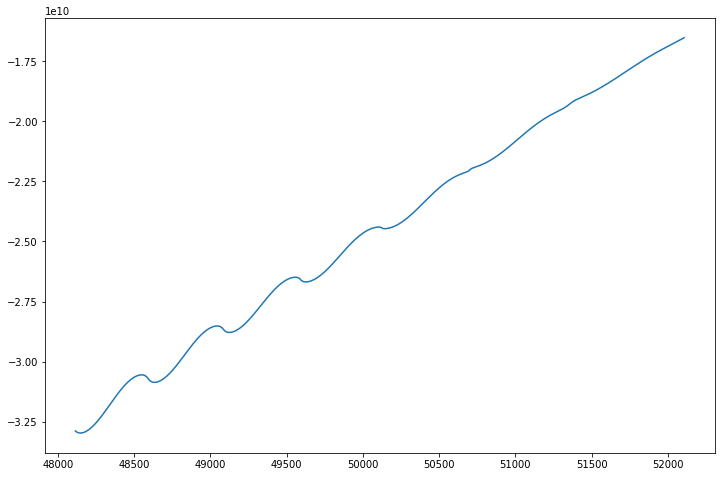

In [45]:
p1.Vz.plot(x='time')

Let's see how the energy changes in time.

In [46]:
c = 299792458000 #mm/s
m = .511 #MeV/c^2

In [47]:
p1.eval('v = (Vx**2+Vy**2+Vz**2)**(1/2)',inplace=True)
p1.eval(f'gamma = (1-(v/{c})**2)**(-1/2)',inplace=True)
p1.eval(f'p = gamma*{m}*v/{c}',inplace=True)

In [48]:
p1

E0          EF            Vx            Vy            Vz  \
48116  105.001243  231.148326  2.250103e+11 -1.953521e+11 -3.288341e+10   
48126  105.001243  231.148326  2.483139e+11 -1.647085e+11 -3.293485e+10   
48136  105.001243  231.148326  2.674749e+11 -1.313168e+11 -3.296145e+10   
48146  105.001243  231.148326  2.821725e+11 -9.573385e+10 -3.297118e+10   
48156  105.001243  231.148326  2.921609e+11 -5.855344e+10 -3.296824e+10   
48166  105.001243  231.148326  2.972732e+11 -2.039599e+10 -3.295493e+10   
48176  105.001243  231.148326  2.974243e+11  1.810036e+10 -3.293264e+10   
48186  105.001243  231.148326  2.926112e+11  5.629877e+10 -3.290233e+10   
48196  105.001243  231.148326  2.829140e+11  9.355726e+10 -3.286471e+10   
48206  105.001243  231.148326  2.684951e+11  1.292540e+11 -3.282036e+10   
48216  105.001243  231.148326  2.495955e+11  1.627933e+11 -3.276980e+10   
48226  105.001243  231.148326  2.265309e+11  1.936155e+11 -3.271350e+10   
48236  105.001243  231.148326  1.996869e+11  2.212068e+11 -3.265190e+10   
48246  105.001243  231.148326  1.695117e+11  2.451069e+11 -3.258545e+10   
48256  105.001243  231.148326  1.365094e+11  2.649177e+11 -3.251459e+10   
48266  105.001243  231.148326  1.012310e+11  2.803094e+11 -3.243977e+10   
48276  105.001243  231.148326  6.426545e+10  2.910260e+11 -3.236143e+10   
48286  105.001243  231.148326  2.622952e+10  2.968896e+11 -3.228004e+10   
48296  105.001243  231.148326 -1.223916e+10  2.978037e+11 -3.219605e+10   
48306  105.001243  231.148326 -5.051121e+10  2.937533e+11 -3.210992e+10   
48316  105.001243  231.148326 -8.794126e+10  2.848058e+11 -3.202213e+10   
48326  105.001243  231.148326 -1.239035e+11  2.711118e+11 -3.193316e+10   
48336  105.001243  231.148326 -1.577990e+11  2.529010e+11 -3.184348e+10   
48346  105.001243  231.148326 -1.890634e+11  2.304782e+11 -3.175357e+10   
48356  105.001243  231.148326 -2.171767e+11  2.042184e+11 -3.166389e+10   
48366  105.001243  231.148326 -2.416716e+11  1.745603e+11 -3.157490e+10   
48376  105.001243  231.148326 -2.621417e+11  1.419992e+11 -3.148707e+10   
48386  105.001243  231.148326 -2.782476e+11  1.070781e+11 -3.140082e+10   
48396  105.001243  231.148326 -2.897231e+11  7.037919e+10 -3.131660e+10   
48406  105.001243  231.148326 -2.963793e+11  3.251389e+10 -3.123481e+10   
...           ...         ...           ...           ...           ...   
51816  105.001243  231.148326 -2.933242e+11  5.939620e+10 -1.754963e+10   
51826  105.001243  231.148326 -2.970030e+11  3.684594e+10 -1.750937e+10   
51836  105.001243  231.148326 -2.989468e+11  1.416267e+10 -1.746949e+10   
51846  105.001243  231.148326 -2.991633e+11 -8.514883e+09 -1.743005e+10   
51856  105.001243  231.148326 -2.976650e+11 -3.111365e+10 -1.739095e+10   
51866  105.001243  231.148326 -2.944710e+11 -5.348537e+10 -1.735225e+10   
51876  105.001243  231.148326 -2.896189e+11 -7.547261e+10 -1.731402e+10   
51886  105.001243  231.148326 -2.831541e+11 -9.695491e+10 -1.727628e+10   
51896  105.001243  231.148326 -2.751309e+11 -1.178169e+11 -1.723903e+10   
51906  105.001243  231.148326 -2.656110e+11 -1.379488e+11 -1.720228e+10   
51916  105.001243  231.148326 -2.546639e+11 -1.572470e+11 -1.716603e+10   
51926  105.001243  231.148326 -2.423657e+11 -1.756145e+11 -1.713027e+10   
51936  105.001243  231.148326 -2.287985e+11 -1.929612e+11 -1.709499e+10   
51946  105.001243  231.148326 -2.140501e+11 -2.092045e+11 -1.706018e+10   
51956  105.001243  231.148326 -1.982132e+11 -2.242692e+11 -1.702581e+10   
51966  105.001243  231.148326 -1.813846e+11 -2.380880e+11 -1.699186e+10   
51976  105.001243  231.148326 -1.636649e+11 -2.506018e+11 -1.695829e+10   
51986  105.001243  231.148326 -1.451574e+11 -2.617592e+11 -1.692506e+10   
51996  105.001243  231.148326 -1.259678e+11 -2.715176e+11 -1.689210e+10   
52006  105.001243  231.148326 -1.062034e+11 -2.798422e+11 -1.685936e+10   
52016  105.001243  231.148326 -8.597253e+10 -2.867065e+11 -1.682676e+10   
52026  105.001243  231.148326 -6.538385e

In [49]:
#p1.eval(f"E = (p**2*{c}**2+{m}**2*{c}**4)**(1/2)",inplace=True)
p1.eval(f"E = (p**2+{m}**2)**(1/2)",inplace=True)

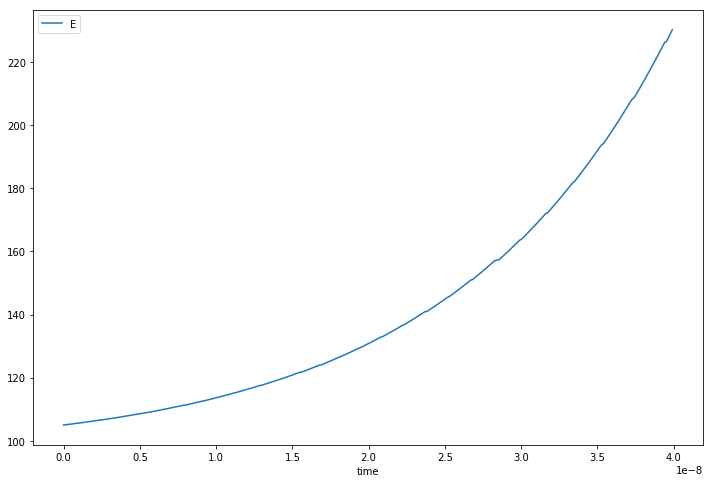

In [50]:
p1.plot(x="time",y="E")

In [51]:
#select = df_small.particle.isin([1,2,3,4,5])

In [52]:
#z_cut = end.Z > 6000
#z_cut = end.Z > 8410
z_cut = end.Z > 7500

z_good = list(end[z_cut].index.values)

zz_cut = df.particle.isin(z_good)

In [53]:
df = df[zz_cut]

In [54]:
df.particle.unique()

[0, 1, 2, 3, 4, ..., 67, 69, 70, 72, 74]
Length: 37
Categories (37, int64): [0, 1, 2, 3, ..., 69, 70, 72, 74]

For now, we've filtered out all particles that stop before the tracker, as they shouldn't affect our weights. Working with custom binning seems nice. In particular, I'd like the center of each bin to correspond to a potential x location in the Mau13 25mm spacing grid.

In [55]:
df_small = df.iloc[::10,:]
'''
#####################
#z_cut = end.Z > 6000
#z_cut = end.Z > 8410

#z_good = list(end[z_cut].index.values)

zz_cut = df_small.particle.isin(z_good)


#df_small = pkl.load(open(mu2e_ext_path+'trajectory/traj.run01-02.df.data.p','rb'))
#df_small = df_small[zz_cut]
df = df_small
'''

"\n#####################\n#z_cut = end.Z > 6000\n#z_cut = end.Z > 8410\n\n#z_good = list(end[z_cut].index.values)\n\nzz_cut = df_small.particle.isin(z_good)\n\n\n#df_small = pkl.load(open(mu2e_ext_path+'trajectory/traj.run01-02.df.data.p','rb'))\n#df_small = df_small[zz_cut]\ndf = df_small\n"

In [56]:
data = [
    #go.Histogram2dContour(
    go.Histogram2d(
        x=df_small['X'],
        y=df_small['Y'],
        colorscale='Viridis',
        #histnorm='probability',
        autobinx=False,
        xbins=dict(
            start=-612.5,
            end=612.5,
            size=25
        ),
        autobiny=False,
        ybins=dict(
            start=-612.5,
            end=612.5,
            size=25
        ),
    )
]
'''
#nbins = 25
#nbins = 75
nbins = 150

data = [
    #go.Histogram2dContour(
    go.Histogram2d(
        x=df_small['X'],
        y=df_small['Y'],
        colorscale='Viridis',
        #histnorm='probability',
        #autobinx=False,
        #xbins=25,
        nbinsx=nbins,
        nbinsy=nbins,
        #bins
        #line=line(width=0.1)
    )
]
'''

axis_template = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444'
)

xaxis = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444',
    title='X (mm)'
)

yaxis = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444',
    title='Y (mm)'
)


layout = go.Layout(xaxis=xaxis,
                   yaxis=yaxis,
                   width=800,
                   height=750,
                   autosize=False,
                   hovermode='closest',
                   title='Signal e- Trajectory 2d Histo'
)

fig = go.Figure(data=data, layout=layout)

In [57]:
#plot(fig, filename=plotdir+"xy_2d_histo_coarse.html")
#plot(fig, filename=plotdir+"xy_2d_histo_finer.html")
plot(fig, filename=plotdir+"xy_2d_histo_1e-10s_steps.html")

'file:///home/ckampa/Coding/Mu2E_Extras/trajectory/plots_michael_05-01-19/xy_2d_histo_1e-10s_steps.html'

In [338]:
#plot(fig, filename=plotdir+"xy_2d_histo_full.html")

'file:///home/ckampa/Coding/Mu2E_Extras/trajectory/plots_michael_05-01-19/xy_2d_histo_full.html'

In [58]:
iplot(fig, filename=plotdir+"xy_2d_histo_1e-10s_steps.html")

In [64]:
df_small.eval('R = (X**2+Y**2)**(1/2)',inplace=True)

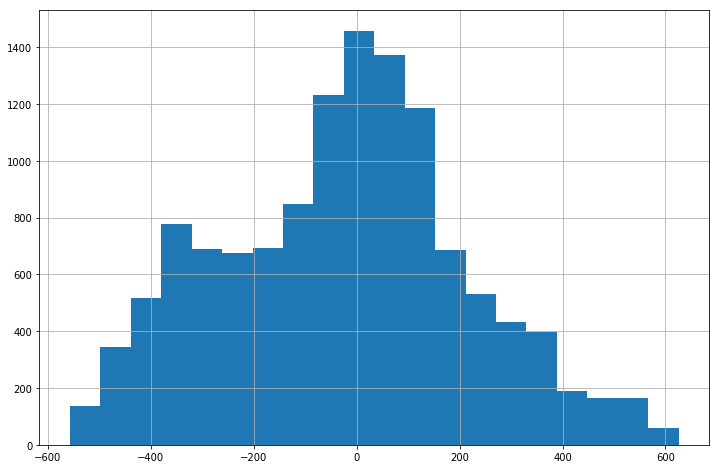

In [61]:
df_small['X'].hist(bins=20)

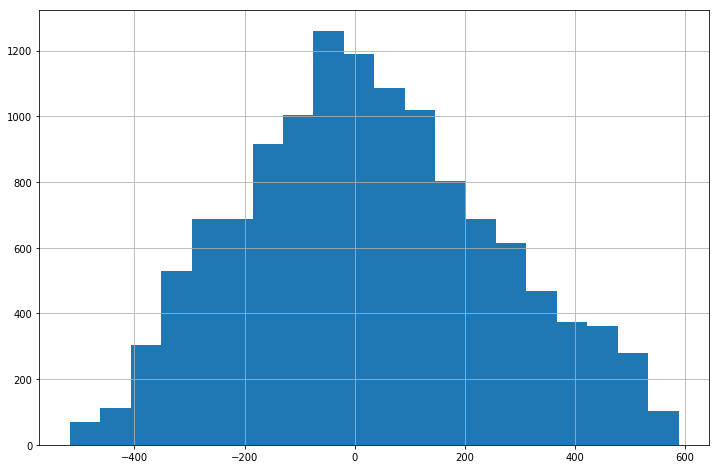

In [60]:
df_small['Y'].hist(bins=20)

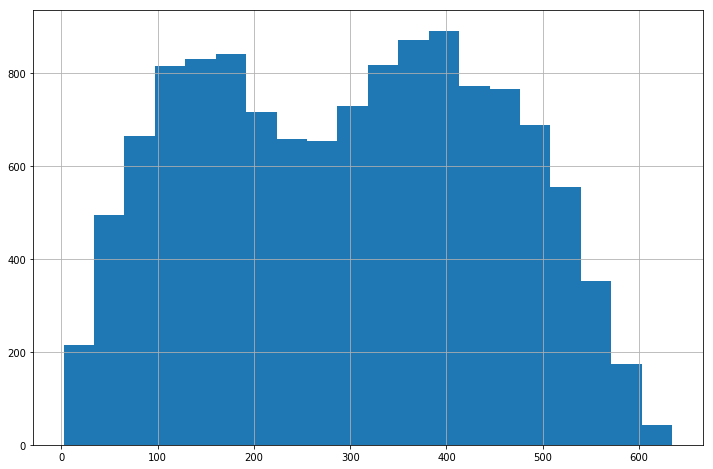

In [65]:
df_small['R'].hist(bins=20)

### Uniform $\phi$, xy

In [15]:
#df['Phi0'] = np.random.uniform(0,2*np.pi,100)
X = np.random.uniform(-600,600,10000)
Y = np.random.uniform(-600,600,10000)

df = pd.DataFrame(np.transpose(np.array([X,Y])),columns=["X","Y"])

In [16]:
df.eval('R = (X**2+Y**2)**(1/2)',inplace=True)

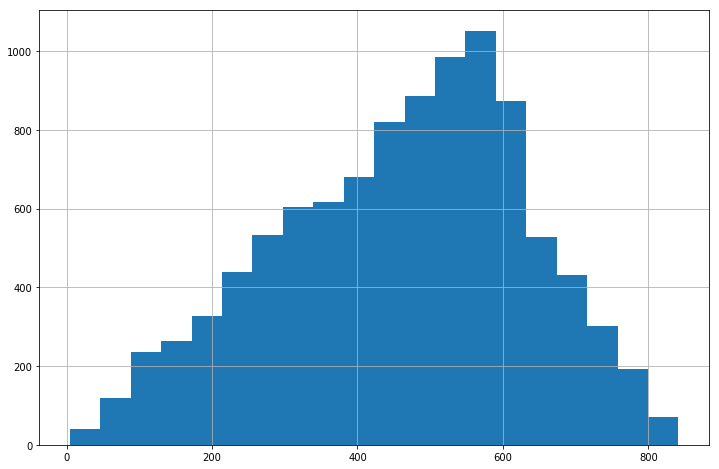

In [17]:
df['R'].hist(bins=20)

In [18]:
data = [
    #go.Histogram2dContour(
    go.Histogram2d(
        x=df['X'],
        y=df['Y'],
        colorscale='Viridis',
        #histnorm='probability',
        autobinx=False,
        xbins=dict(
            start=-612.5,
            end=612.5,
            size=25
        ),
        autobiny=False,
        ybins=dict(
            start=-612.5,
            end=612.5,
            size=25
        ),
    )
]

xaxis = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444',
    title='X (mm)'
)

yaxis = dict(
    ticks='',
    showgrid=False,
    zeroline=False,
    showline=True,
    mirror=True,
    linewidth=2,
    linecolor='#444',
    title='Y (mm)'
)


layout = go.Layout(xaxis=xaxis,
                   yaxis=yaxis,
                   width=800,
                   height=750,
                   autosize=False,
                   hovermode='closest',
                   title='Signal e- Trajectory 2d Histo'
)

fig = go.Figure(data=data, layout=layout)

In [19]:
iplot(fig)